In [1]:
from grale.all_nb import *
import pandas as pd
import pickle
import matplotlib.pyplot as plt

Set 'threads' as default renderer for lensplane and mass density
Set default angular unit in plotting to arcsec
Set feedback style to 'notebook'


In [2]:
paramInfo = pickle.load(open("params_noise.dat", "rb"))
#paramInfo

In [3]:
names = [ x["name"] for x in paramInfo ]
scales = np.array([ x["scalefactor"] for x in paramInfo ]).reshape((1,-1))
samples = np.fromfile("samples_noise.dat", dtype=np.float32).reshape((-1,len(names)))
list(zip(names,scales[0,]))

[('x_0_scaled', 6.398142822577112e-05),
 ('y_0_scaled', 6.398142822577112e-05),
 ('angle_0', 57.29577951308232),
 ('lens_0,centraldensity_scaled', 3.134174683411349),
 ('lens_0,coreradius_scaled', 6.398142822577112e-05),
 ('lens_0,scaleradius_difference_scaled', 6.398142822577112e-05),
 ('lens_0,epsilon', 1.0),
 ('x_1_scaled', 6.398142822577112e-05),
 ('y_1_scaled', 6.398142822577112e-05),
 ('angle_1', 57.29577951308232),
 ('lens_1,centraldensity_scaled', 3.134174683411349),
 ('lens_1,coreradius_scaled', 6.398142822577112e-05),
 ('lens_1,scaleradius_difference_scaled', 6.398142822577112e-05),
 ('lens_1,epsilon', 1.0)]

In [4]:
scaledSamples = samples*scales

In [5]:
df = pd.DataFrame(scaledSamples, columns=names)
df["x_0_scaled"] /= ANGLE_ARCSEC
df["y_0_scaled"] /= ANGLE_ARCSEC
df["lens_0,coreradius_scaled"] /= ANGLE_ARCSEC
df["lens_0,scaleradius_difference_scaled"] /= ANGLE_ARCSEC
df["x_1_scaled"] /= ANGLE_ARCSEC
df["y_1_scaled"] /= ANGLE_ARCSEC
df["lens_1,coreradius_scaled"] /= ANGLE_ARCSEC
df["lens_1,scaleradius_difference_scaled"] /= ANGLE_ARCSEC
names

['x_0_scaled',
 'y_0_scaled',
 'angle_0',
 'lens_0,centraldensity_scaled',
 'lens_0,coreradius_scaled',
 'lens_0,scaleradius_difference_scaled',
 'lens_0,epsilon',
 'x_1_scaled',
 'y_1_scaled',
 'angle_1',
 'lens_1,centraldensity_scaled',
 'lens_1,coreradius_scaled',
 'lens_1,scaleradius_difference_scaled',
 'lens_1,epsilon']

In [6]:
def plotHist(df, colName):
    data = df[colName]
    #mu = np.mean(data)
    #sigma = np.std(data)

    q25, q75 = np.percentile(data, [25, 75]) # More robust
    mu = (q25 + q75) / 2  # center of IQR
    sigma = (q75 - q25) / (2 * 0.6745)

    rnge = [mu-5*sigma,mu+5*sigma]
    plt.hist(data, bins=100, density=True, range=rnge)
    plt.gca().set_xlim(rnge)
    x = np.linspace(*rnge, 1000)
    y = 1/((2*np.pi)**0.5*sigma)*np.exp(-(x-mu)**2/(2*sigma**2))
    plt.plot(x, y)
    plt.title(f"{colName}: mu = {mu:.5g}, sigma = {sigma:.5g}")

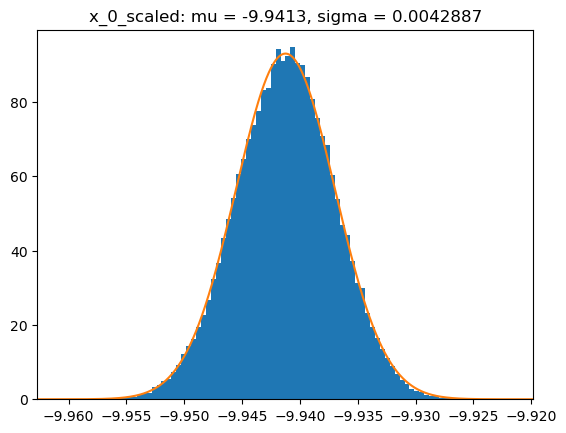

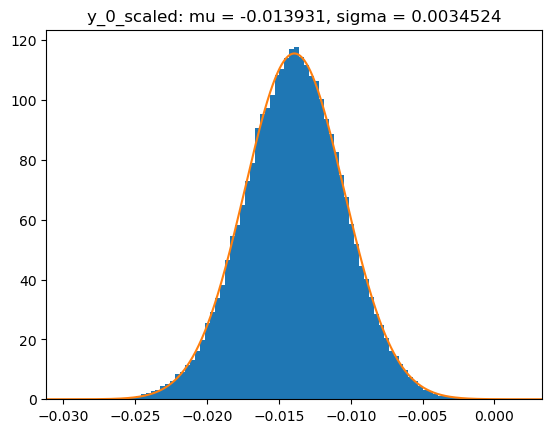

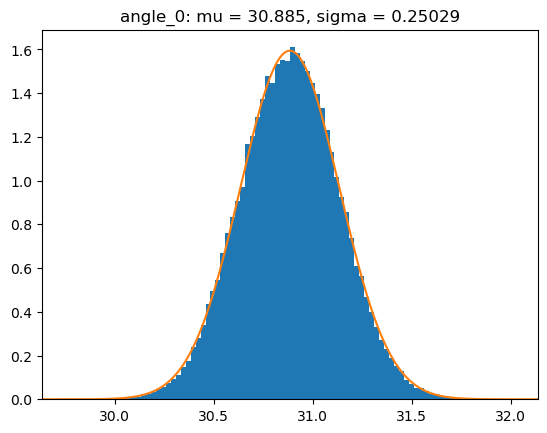

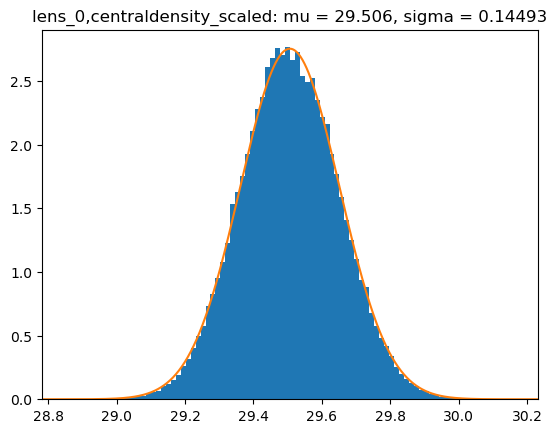

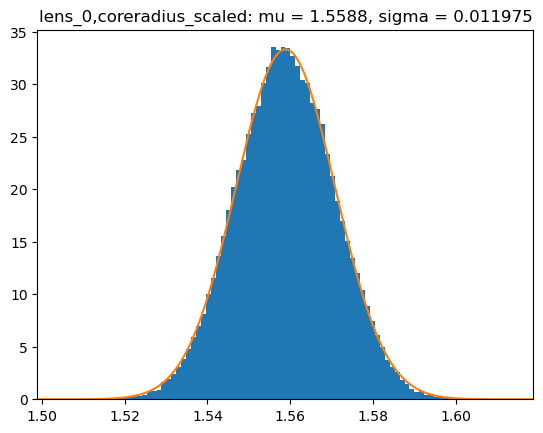

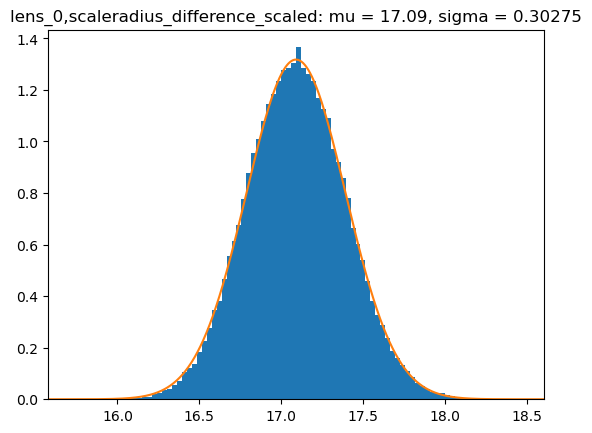

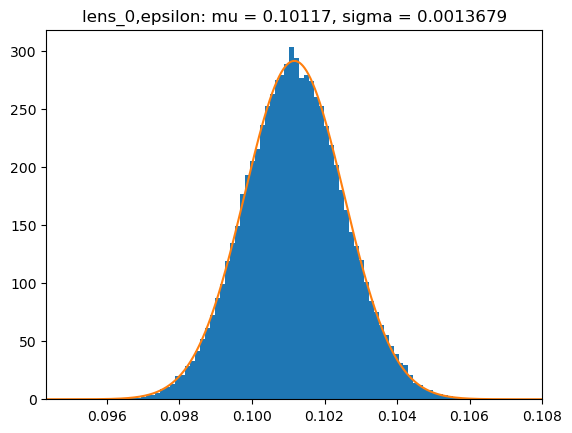

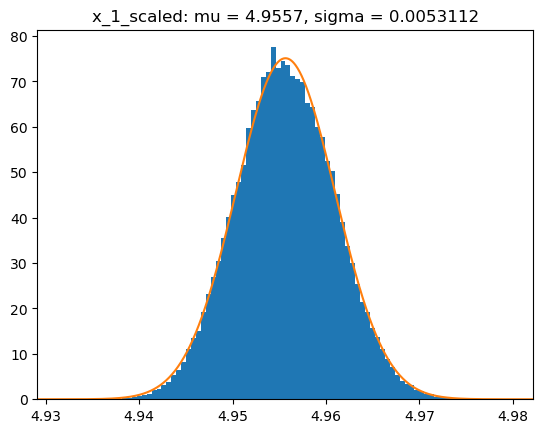

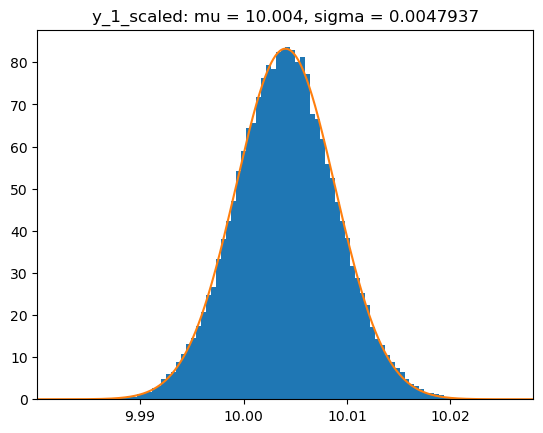

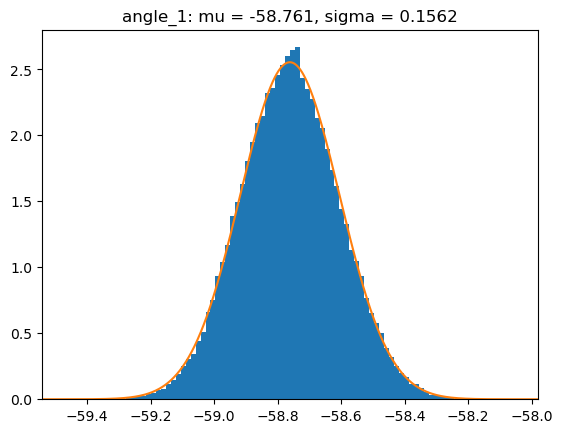

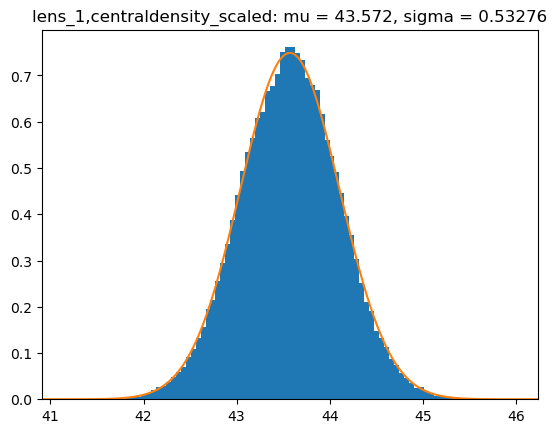

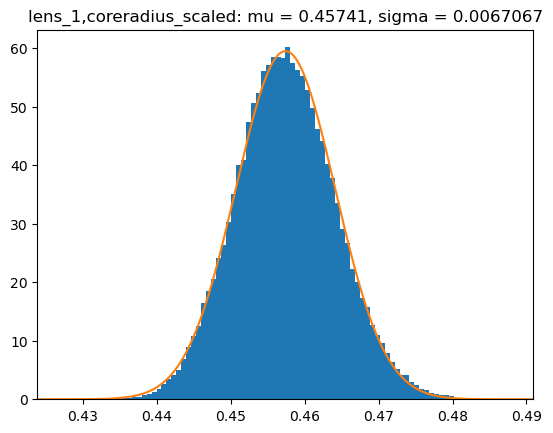

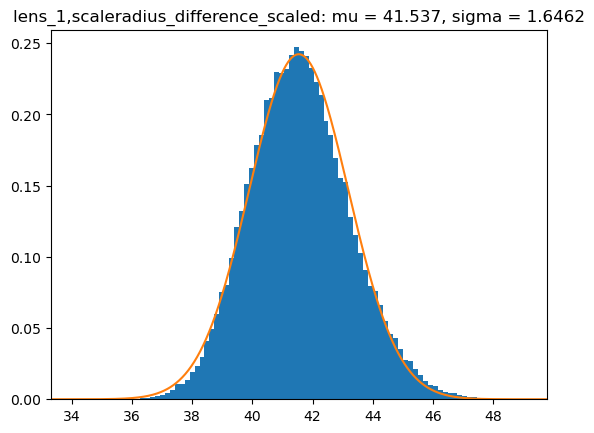

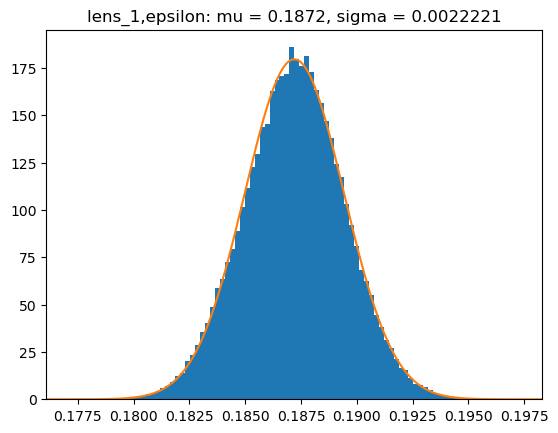

In [7]:
for n in names:
    plt.figure()
    plotHist(df, n)